In [ ]:
## Exercício 1 - Dataset Breast Cancer do sklearn

# Acesso: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

# 1) Importar o pacote "sklearn.datasets" e o "load_breast_cancer"
# 2) Carregar o dataset através do método: load_breast_cancer()
# 3) A chave "data" são as features e a chave "target" é o y. Separe os dados em 2 variáveis diferentes
# O dataset possui 30 features. Vamos aplicar métodos de seleção de features analisando se o desempenho é melhorado!
# 4) Transformar os dados em um dataframe pandas:

# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target

# 5) Separe o conjunto de dados em treinamento e teste usando o método: "train_test_split" (80% - 20%)
# 6) Treinar uma árvores de decisão, fazer a predição e calcular a taxa de acerto

# SelectKBest para classificação:

# 7) Usar o SelectKBest com a função: f_classif para selecionar as 10 melhores features do conjunto total: (X,y)
# 8) Filtrar as colunas selecionadas do conjunto X_train e X_test
# 9) Treinar uma nova árvore de decisão com as features filtradas
# 10) Fazer a predição e calcular a taxa de acerto

# Recursive Filter Elimination (RFE) - método wrapper

# 11) Usar o RFE com árvore de decisão para selecionar as 10 melhores features do conjunto total: (X,y)
# 12) Filtrar as colunas selecionadas do conjunto X_train e X_test
# 13) Treinar uma nova árvore de decisão com as features filtradas
# 14) Fazer a predição e calcular a taxa de acerto

# Exercício 1

In [ ]:
# 1) Importar o pacote "sklearn.datasets" e o "load_breast_cancer"
# 2) Carregar o dataset através do método: load_breast_cancer()
# 3) A chave "data" são as features e a chave "target" é o y. Separe os dados em 2 variáveis diferentes
# O dataset possui 30 features. Vamos aplicar métodos de seleção de features analisando se o desempenho é melhorado!
# 4) Transformar os dados em um dataframe pandas:

import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data['data']
y = data['target']
df = pd.DataFrame(data['data'], columns= data.feature_names)
df['target'] = data['target']

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
# 5) Separe o conjunto de dados em treinamento e teste usando o método: "train_test_split" (80% - 20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
# 6) Treinar uma árvores de decisão, fazer a predição e calcular a taxa de acerto

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

modelo = DecisionTreeClassifier(criterion="entropy", max_depth=8)
modelo.fit(X_train, y_train)

resultados = modelo.predict(X_test)
acc = metrics.accuracy_score(resultados, y_test)
acc = round(acc * 100)

print(f"Porcentagem de acerto = {acc}%")

Porcentagem de acerto = 93%


### Selecte K Bestes com o f_classifc

In [ ]:
# 7) Usar o SelectKBest com a função: f_classif para selecionar as 10 melhores features do conjunto total: (X,y)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

f_classiftest = SelectKBest(score_func = f_classif, k = 10)
modelofeat = f_classiftest.fit(X,y)

modelofeat.get_feature_names_out()

array(['x0', 'x2', 'x3', 'x6', 'x7', 'x20', 'x22', 'x23', 'x26', 'x27'],
      dtype=object)

In [ ]:
# 8) Filtrar as colunas selecionadas do conjunto X_train e X_test

colunas = modelofeat.get_support(indices = True)

train_x = pd.DataFrame(X_train).iloc[:,colunas]
test_x = pd.DataFrame(X_test).iloc[:,colunas]


In [ ]:
# 9) Treinar uma nova árvore de decisão com as features filtradas
# 10) Fazer a predição e calcular a taxa de acerto

modelo2 = DecisionTreeClassifier(criterion='entropy',max_depth = 8)
modelo2.fit(train_x, y_train)

resultado = modelo2.predict(test_x)
acc = metrics.accuracy_score(resultado, y_test)
percent = round(acc*100)

print(f" Percentual de acertos (com KBeast) = {percent}%")

 Percentual de acertos (com KBeast) = 94%


### RFE - Método wrapper

In [ ]:
import matplotlib.pyplot as plt

modelo3 = DecisionTreeClassifier(criterion='entropy', max_depth = 8)
modelo3.fit(X,y)
print(modelo3.feature_importances_)

[0.         0.         0.         0.         0.01197349 0.
 0.         0.         0.         0.         0.01094813 0.
 0.         0.01759705 0.00665925 0.00802236 0.         0.
 0.         0.0073794  0.         0.06578938 0.68588894 0.00449035
 0.04462567 0.         0.         0.10586534 0.01728774 0.01347288]


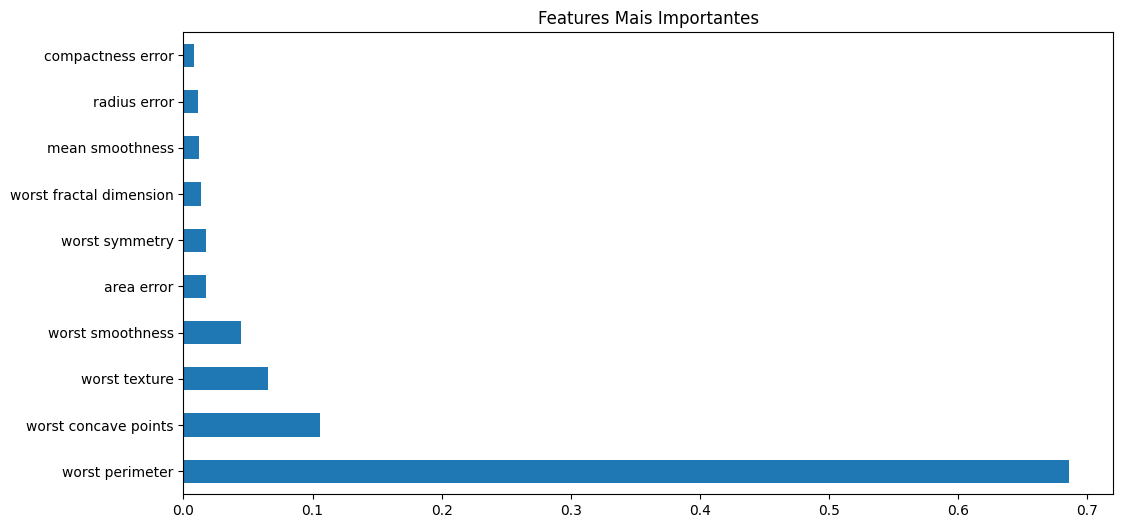

In [ ]:
#A título de curiosidade...
#Investigando a importancia das features obtida pelo modelo3

feat_importances = pd.Series(modelo3.feature_importances_, index = data.feature_names)
plt.figure(figsize=(12,6))
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Features Mais Importantes")
plt.show()

In [ ]:
# 11) Usar o RFE com árvore de decisão para selecionar as 10 melhores features do conjunto total: (X,y)

from sklearn.feature_selection import RFE

modelo4 = DecisionTreeClassifier(criterion='entropy', max_depth = 8)

rfe = RFE(modelo4, n_features_to_select = 10)

fit_rfe = rfe.fit(X,y)

colunas = fit_rfe.get_support(indices=True)
colunas

array([13, 16, 21, 22, 23, 24, 25, 26, 27, 28])

In [ ]:
# 12) Filtrar as colunas selecionadas do conjunto X_train e X_test
# 13) Treinar uma nova árvore de decisão com as features filtradas
# 14) Fazer a predição e calcular a taxa de acerto

x_train = pd.DataFrame(X_train).iloc[:,colunas]
x_test = pd.DataFrame(X_test).iloc[:,colunas]

modelo6 = DecisionTreeClassifier(criterion='entropy', max_depth=8)
modelo6.fit(x_train,y_train)

resultados = modelo6.predict(x_test)
acc = metrics.accuracy_score(resultados,y_test)
percentual = round(acc*100)

print(f"Percentual de acertos (com RFE) = {percentual}%")

Percentual de acertos (com RFE) = 94%
